# Introduction

The National UFO Reporting Center (NUFORC) has been in operation since 1974. In their own words, "The Center’s primary function over the past five decades has been to receive, record, and to the greatest degree possible, corroborate and document reports from individuals who have been witness to unusual, possibly UFO-related events". They make no claims as to the validity of the information in any of these reports.  They have omitted any of the obvious hoaxes, however most reports have been posted exactly as received in the author’s own words. Their full database contains over 147,000 entries, but we chose a more concise version.

For our project we chose a dataset of recorded UFO sightings. We found this dataset at https://corgis-edu.github.io/corgis/python/ufo_sightings/. However, the data for the set comes from the  (https://nuforc.org/). The data was taken from the the NUFORC, was cleaned and uplaoed to GitHub by Sigmonf Axel. The dataset contains over 80,000 entries from around the world.

We chose this dataset because we are intrigued by UFOs and how we can interact with them. We had questions such as Where are we most likely to see a UFO? Where are we most likely to see a _____ shaped UFO? Where are we most likely to have our longest encounter? What if we want our encounter to be at a certain time of day? If we go to a certain place, what is the most likely shape of a UFO? 

# Materials

Our dataset consists of 11 columns, and 80,332 entries. The attriubtes are: date_time, city_area, state, country, ufo_shape, encounter_length, described_encounter_length, description, date_documented, latitude, and longitude. Most of these are self explanatory, but some could use fome further explanation. 

- "date_time" is the day, month, year, and time of day that the encounter happened, but "date_documented" is the date that the encounter was reproted to the NUFORC. The difference between these ranges from 0 days to many years. 
    
- "described_encounter_length" is the length of the encounter as reported by the party reporting it. Often this contains text, such as "30 seconds", or "1-2 hours". "encounter_length" takes the value from the described encounter length and converts it to seconds. In cases where a time range is given, the ceiling of that range is taken for the encounter_length".

Our data was already very clean when we started. Many of the "important" attributes have very few missing values. Importance is relative in this case. While there are lots of missing values in the "country" column, there is only 1 missing value in the "latitude" and "longitude" columns. Since latitude and longitude can be used to find the exact location of the encounter, they are more important than the "city_area", "state", and "country" attributes which means we can worry less about those missing values.

# Methods

This is where we talk about our methods

The first algorithm that we ran was a k-means algorithm. We wanted to group the encounters based off of their location (latitude and longitude). We first did this on the entire set, and then we focused on North America. We chose k-means due to the size of our dataset as k-means is linear; it is relatively scalable. K-means is also a simpler clustering algorithm and was not very difficult to implement. ALSO EXPLAIN THE ALGORITHM

We also tried to make a classifier model for the dataset. The goal was the be able to guess the shape of a UFO based off of its latitude and longitude. We used a RandomForestClassifier for this. EXPLAIN WHAT THAT IS. EXPLAIN WHY WE PICKED IT.


# Results

This is where we show all of our results

In [39]:
import pandas as pd
ufos = pd.read_csv("ufo_sightings.csv");
ufos = ufos.dropna(subset=['latitude', 'longitude'])

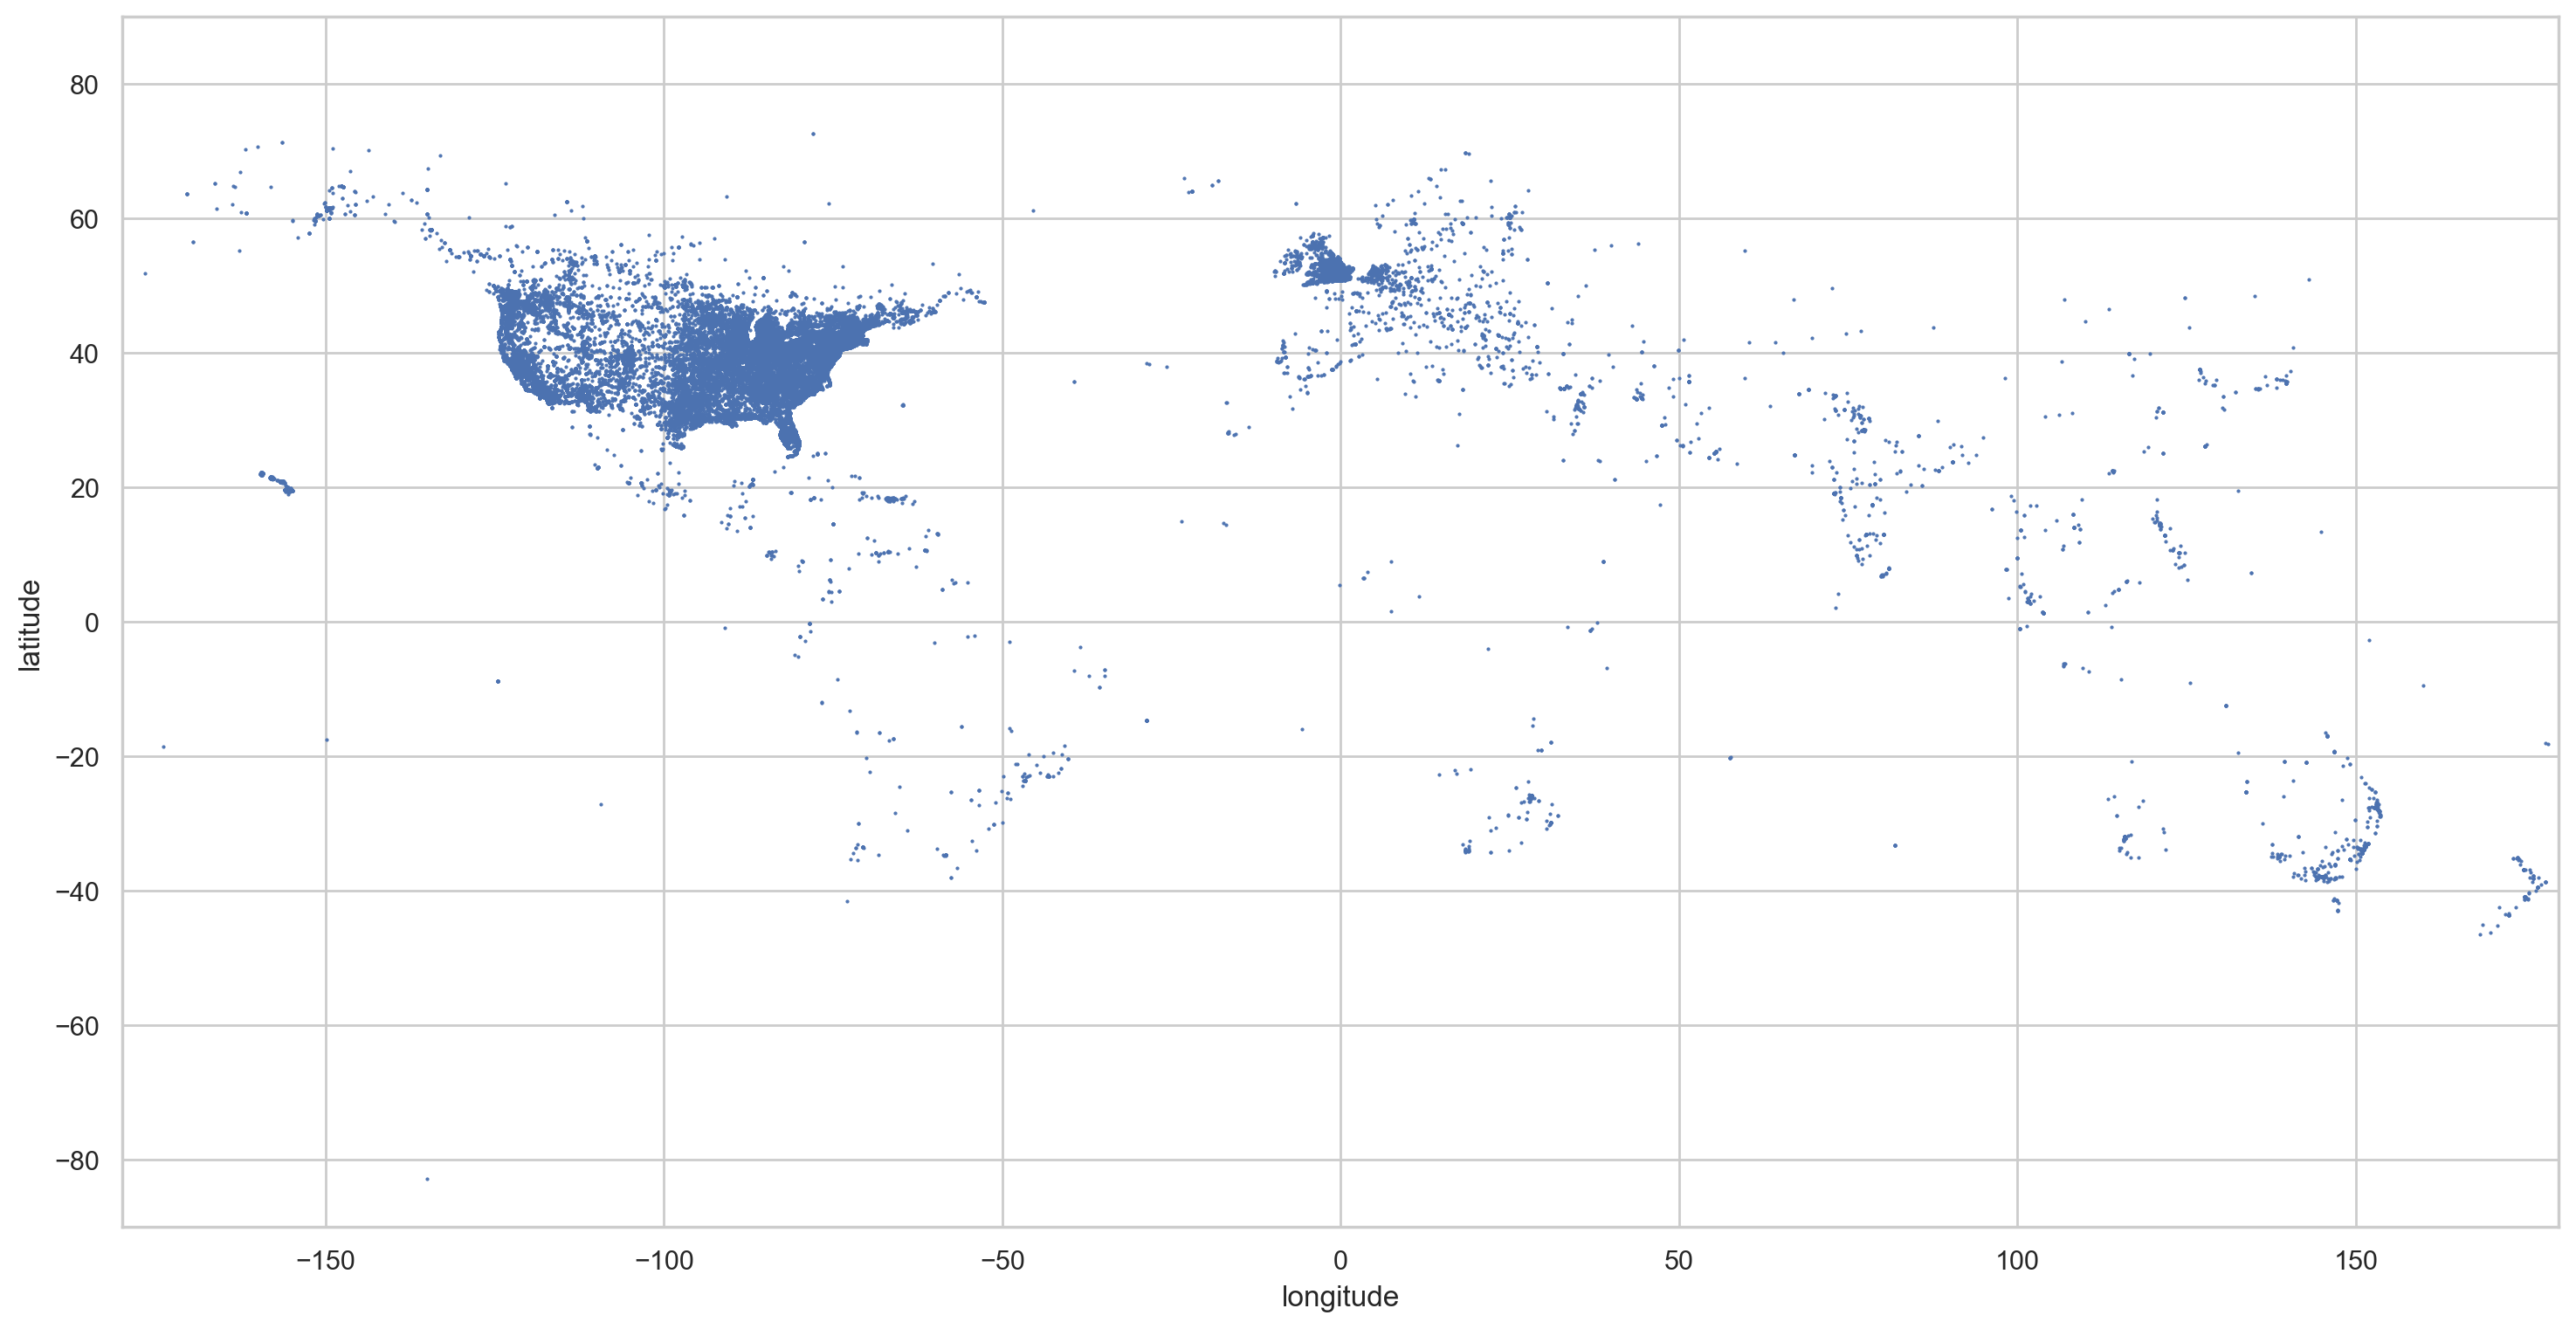

In [28]:
xpoints = ufos['longitude']
ypoints = ufos['latitude']
fig = plt.figure(figsize=(18,9),dpi=200)
plt.scatter(xpoints, ypoints, 0.25)
plt.axis([-180,180,-90, 90])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

latitude     0
longitude    0
dtype: int64


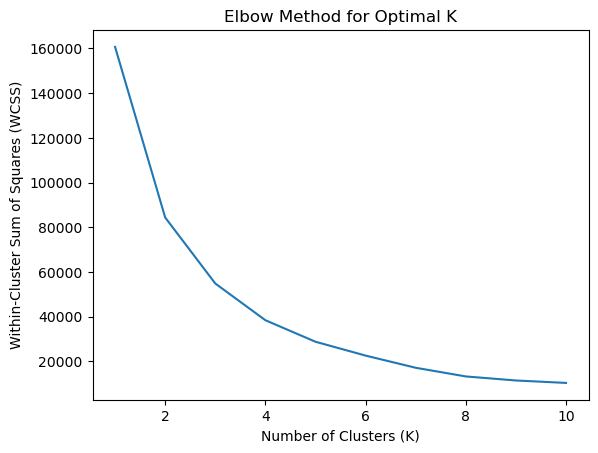

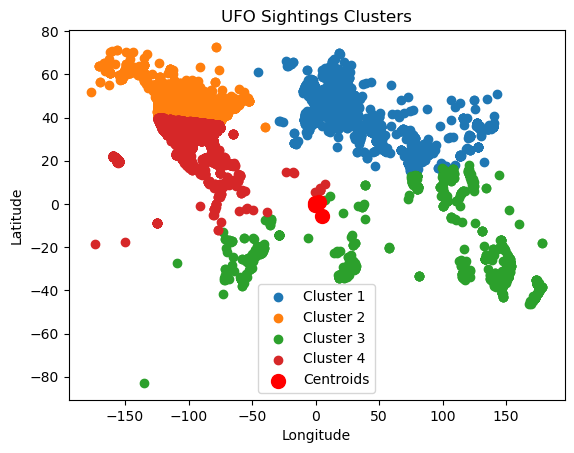

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coordinates_df = ufos[['latitude', 'longitude']]

coordinates_df = coordinates_df.dropna()

coordinates_df.head()

nan_count = coordinates_df.isna().sum()
print(nan_count)


scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_df)

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Let's say the optimal K is 4 (as an example)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
coordinates_df['cluster'] = kmeans.fit_predict(coordinates_scaled)

# Scatter plot for each cluster
for cluster in range(optimal_k):
    cluster_df = coordinates_df[coordinates_df['cluster'] == cluster]
    plt.scatter(cluster_df['longitude'], cluster_df['latitude'], label=f'Cluster {cluster + 1}')

# Plot the centroids if needed
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='red', label='Centroids')

plt.title('UFO Sightings Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

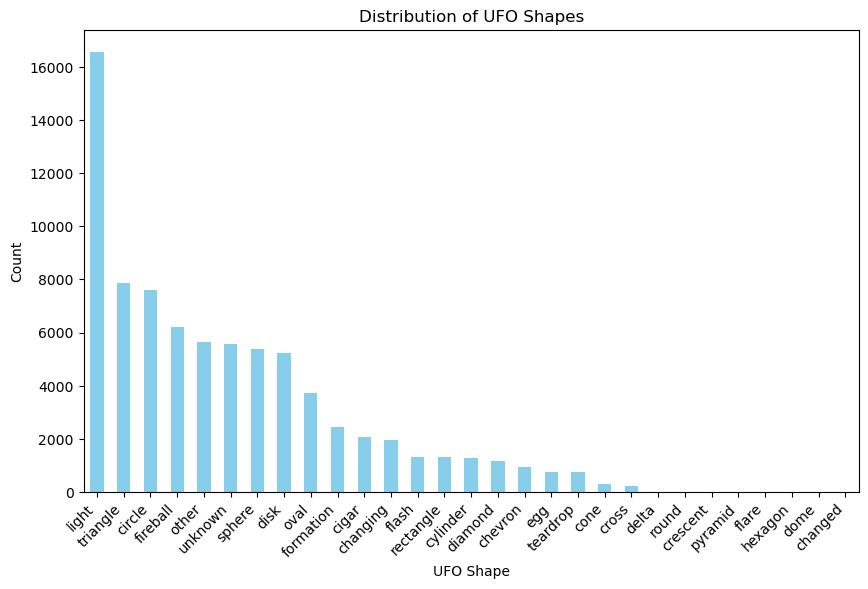

In [3]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shapes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

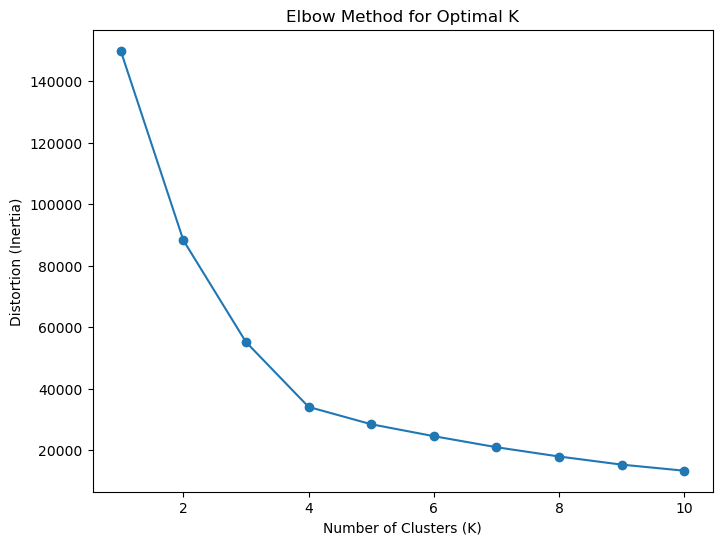

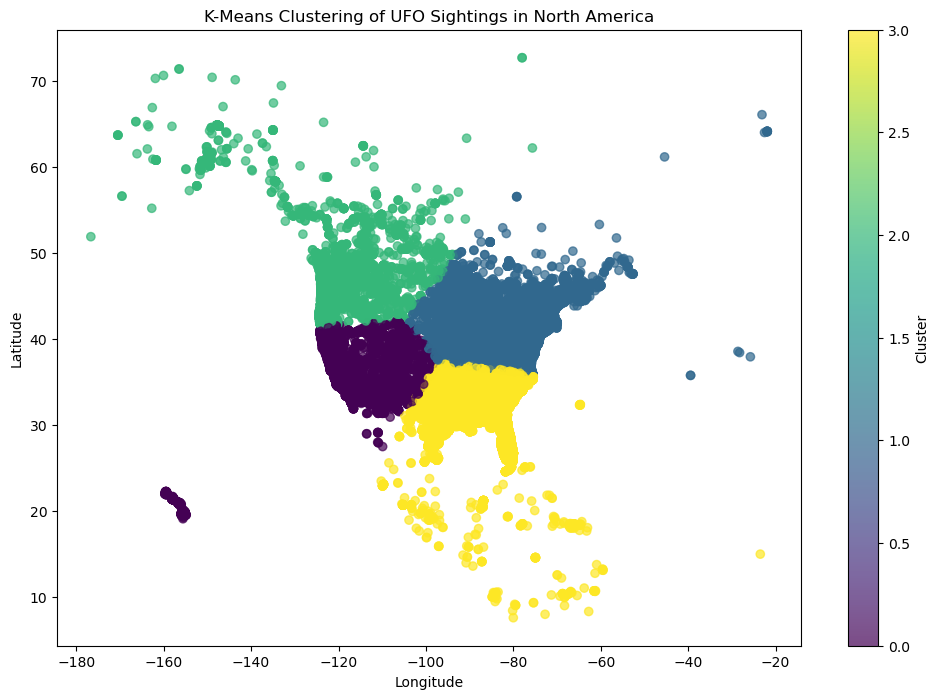

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' columns
filtered_ufos = ufos.copy()  # Create a copy to avoid modifying the original DataFrame
filtered_ufos = filtered_ufos[(filtered_ufos['latitude'] >= 7) & (filtered_ufos['latitude'] <= 85) & (filtered_ufos['longitude'] >= -179) & (filtered_ufos['longitude'] <= -20)]
coordinates = filtered_ufos[['latitude', 'longitude']]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(coordinates_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
#plt.show()

# Based on the elbow method, choose the optimal K (e.g., 3 or 4)
optimal_k = 4

# Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Set n_init to your preferred value
cluster_labels = kmeans.fit_predict(coordinates_scaled)

# Add the cluster labels to the DataFrame using .loc
filtered_ufos.loc[:, 'cluster'] = cluster_labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_ufos['longitude'], filtered_ufos['latitude'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of UFO Sightings in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


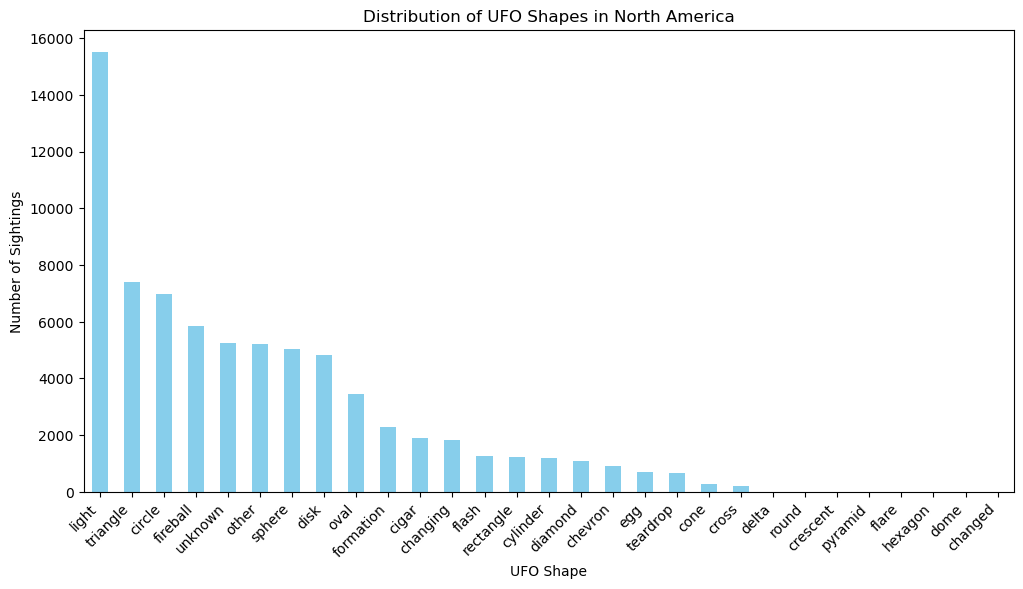

In [5]:
import matplotlib.pyplot as plt

# Assuming 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]

# Count the occurrences of each shape
shape_counts = filtered_ufos['ufo_shape'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
shape_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes in North America')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


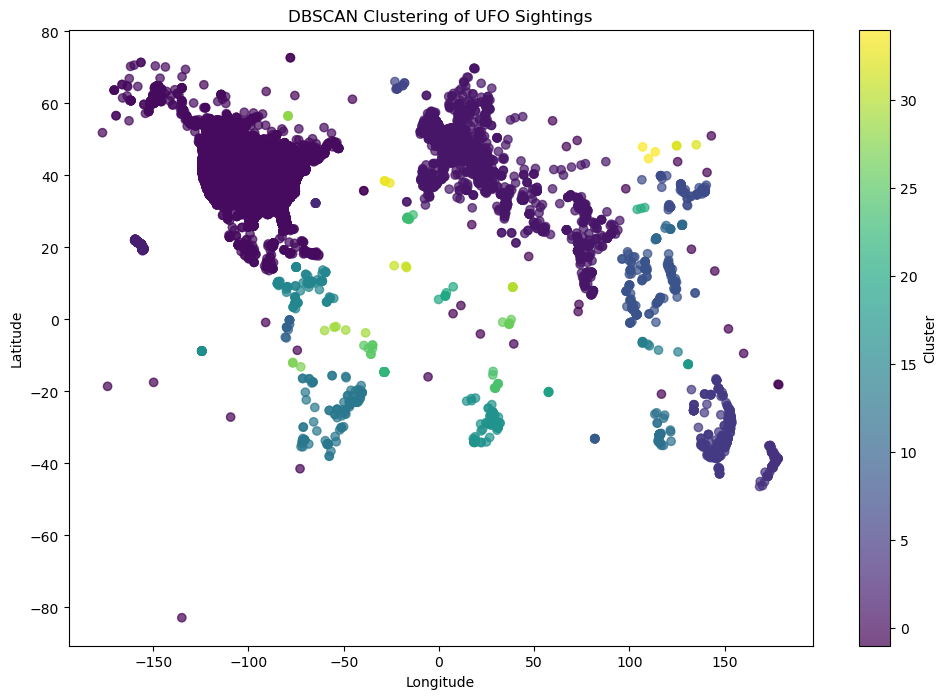

In [6]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'ufos' with columns 'latitude' and 'longitude'

coordinates = ufos[['latitude', 'longitude']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Apply DBSCAN
epsilon = 0.3  # Adjust this parameter based on the density of your data
min_samples = 3  # Adjust this parameter based on the minimum number of points you want in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
ufos['cluster'] = dbscan.fit_predict(coordinates_scaled)

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(ufos['longitude'], ufos['latitude'], c=ufos['cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


/var/folders/jz/b8ydxt_56qlcmx1pvfyjs5jc0000gn/T/ipykernel_12969/4216862158.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ufos.loc[:, 'dbscan_cluster'] = dbscan_labels


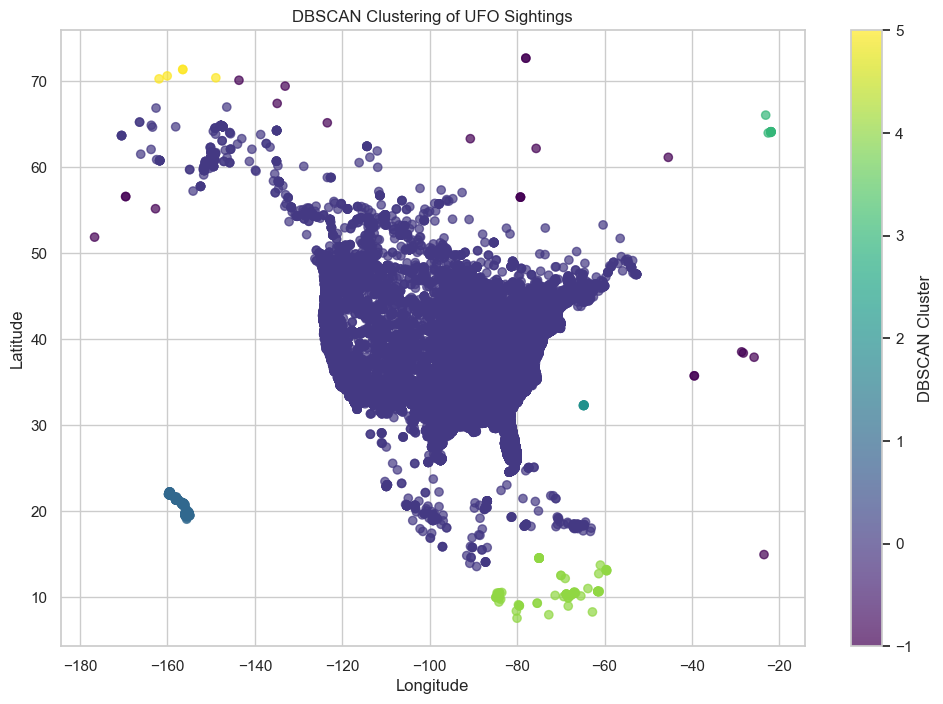

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'latitude' and 'longitude' columns in your DataFrame
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]
coordinates = filtered_ufos[['latitude', 'longitude']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(coordinates_scaled)

# Add the cluster labels to the DataFrame
filtered_ufos.loc[:, 'dbscan_cluster'] = dbscan_labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_ufos['longitude'], filtered_ufos['latitude'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='DBSCAN Cluster')
plt.show()


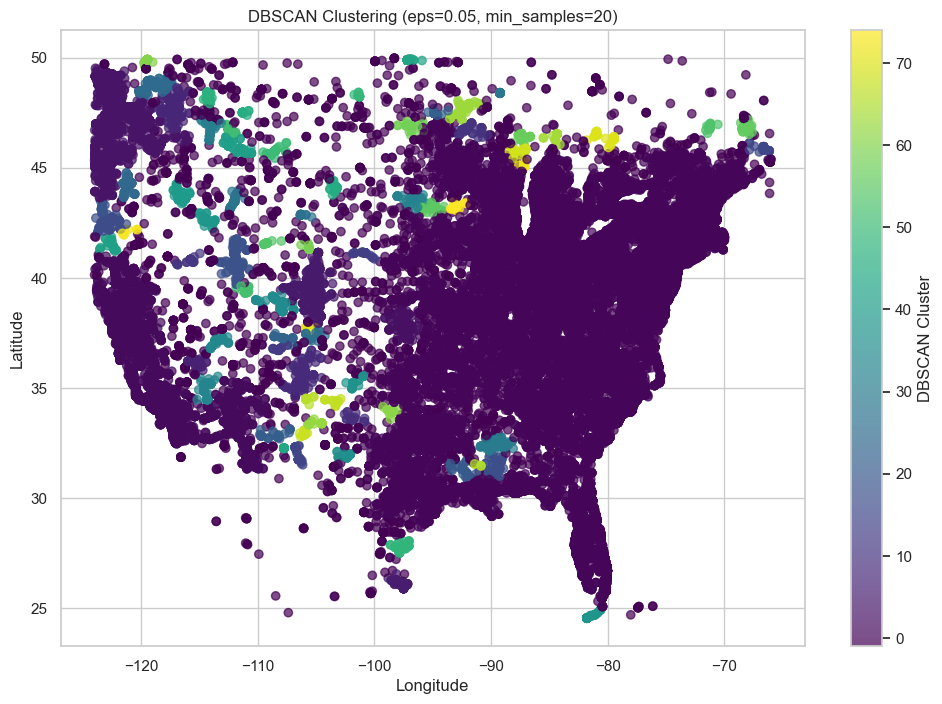

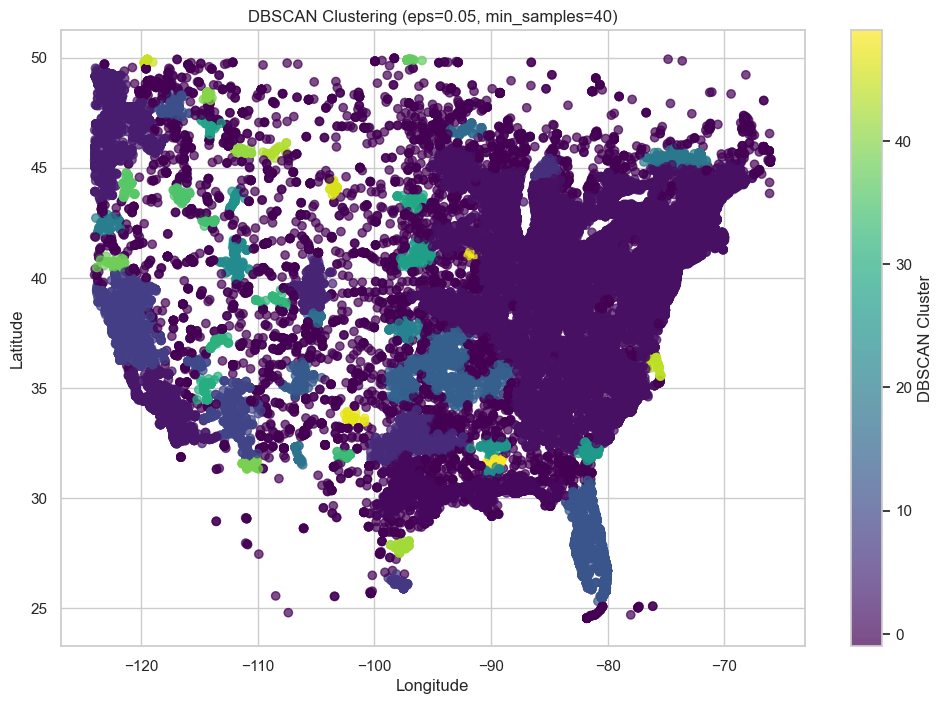

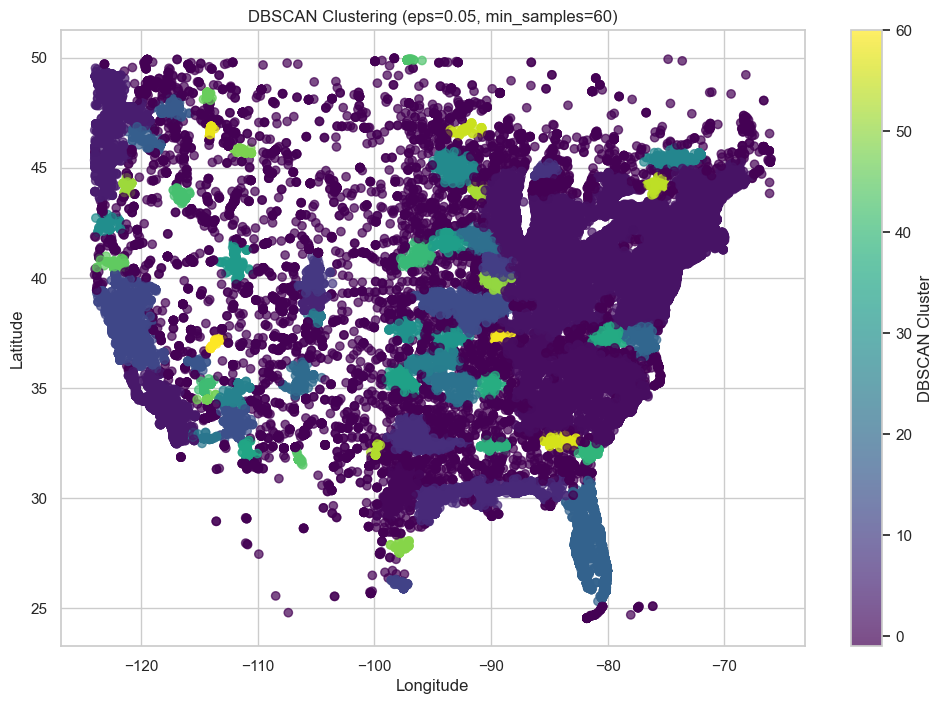

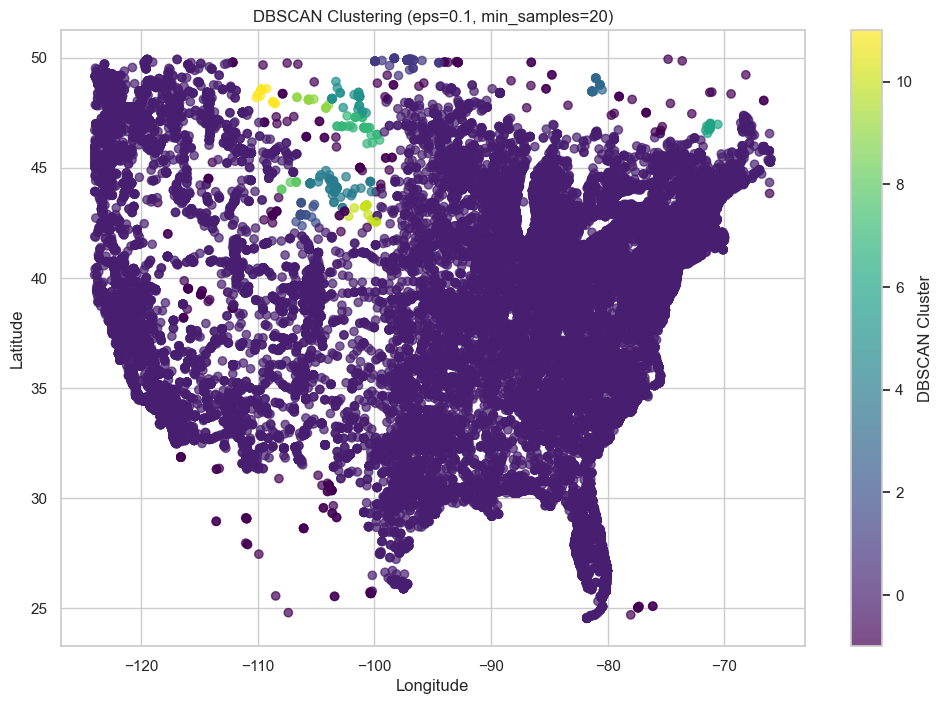

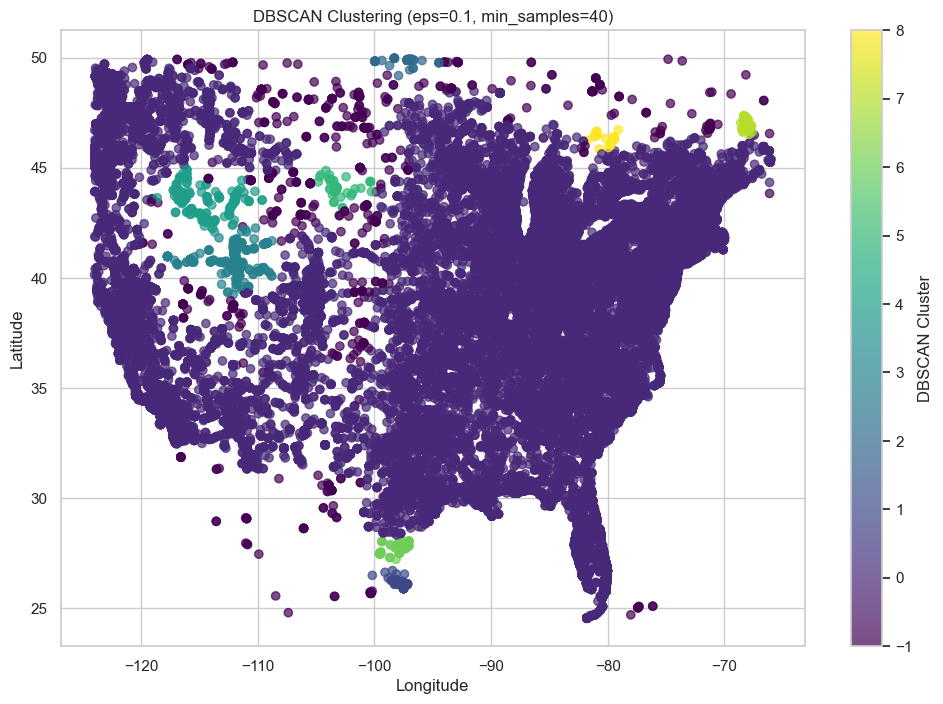

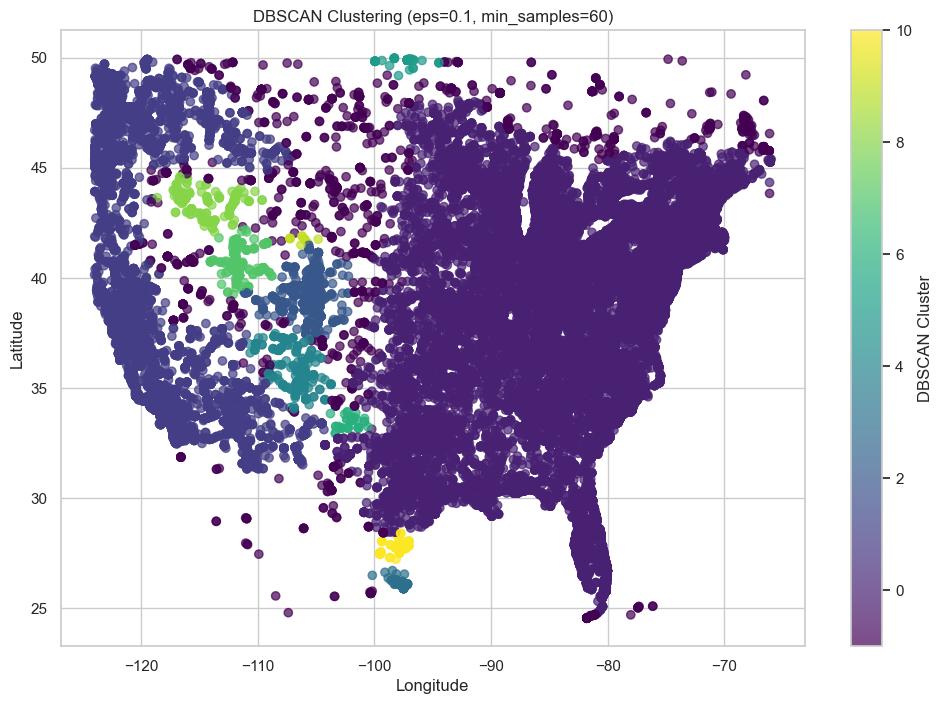

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' columns in your DataFrame
filtered_ufos = ufos[(ufos['latitude'] >= 24) & (ufos['latitude'] <= 50) & (ufos['longitude'] >= -124) & (ufos['longitude'] <= -66)]
coordinates = filtered_ufos[['latitude', 'longitude']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Iterate through different values of eps and min_samples
eps_values = [.05, .1]
min_samples_values = [20, 40, 60]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(coordinates_scaled)

        # Visualize the clusters on a scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(filtered_ufos['longitude'], filtered_ufos['latitude'], c=dbscan_labels, cmap='viridis', alpha=0.7)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.colorbar(label='DBSCAN Cluster')
        plt.show()


/var/folders/jz/b8ydxt_56qlcmx1pvfyjs5jc0000gn/T/ipykernel_12969/766763276.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ufos['dbscan_cluster'] = dbscan_labels


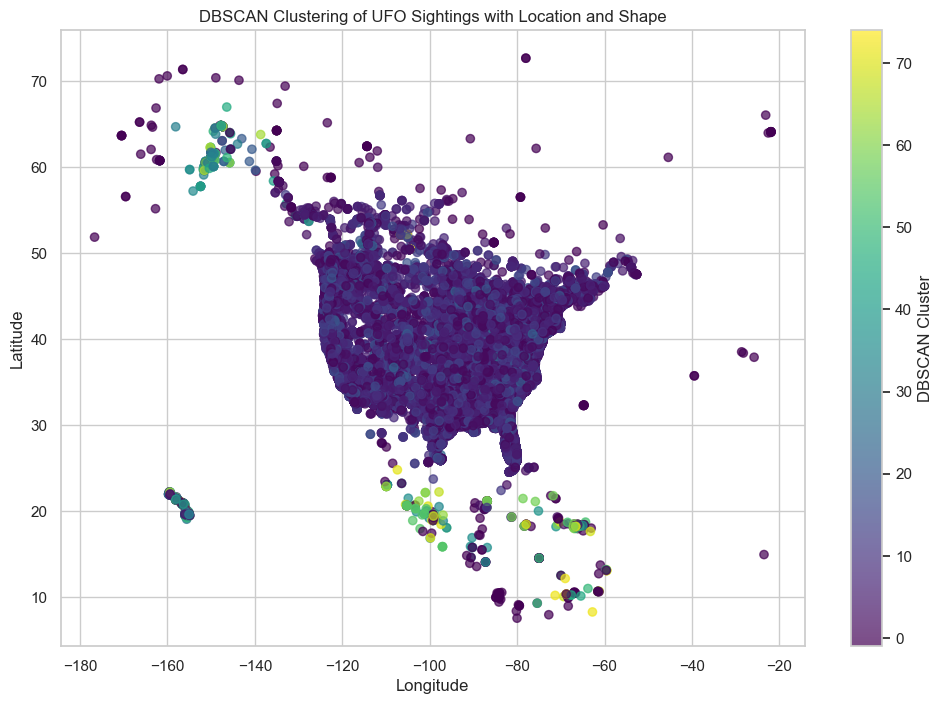

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming 'ufos' is your DataFrame with 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]
coordinates_and_shape = filtered_ufos[['latitude', 'longitude', 'ufo_shape']]

# Separate numerical and categorical features
numerical_features = ['latitude', 'longitude']
categorical_features = ['ufo_shape']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Create a pipeline
pipeline = Pipeline([('preprocessor', preprocessor), ('dbscan', dbscan)])

# Apply DBSCAN with preprocessed data
dbscan_labels = pipeline.fit_predict(coordinates_and_shape)

# Add the cluster labels to the DataFrame
filtered_ufos['dbscan_cluster'] = dbscan_labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_ufos['longitude'], filtered_ufos['latitude'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering of UFO Sightings with Location and Shape')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='DBSCAN Cluster')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

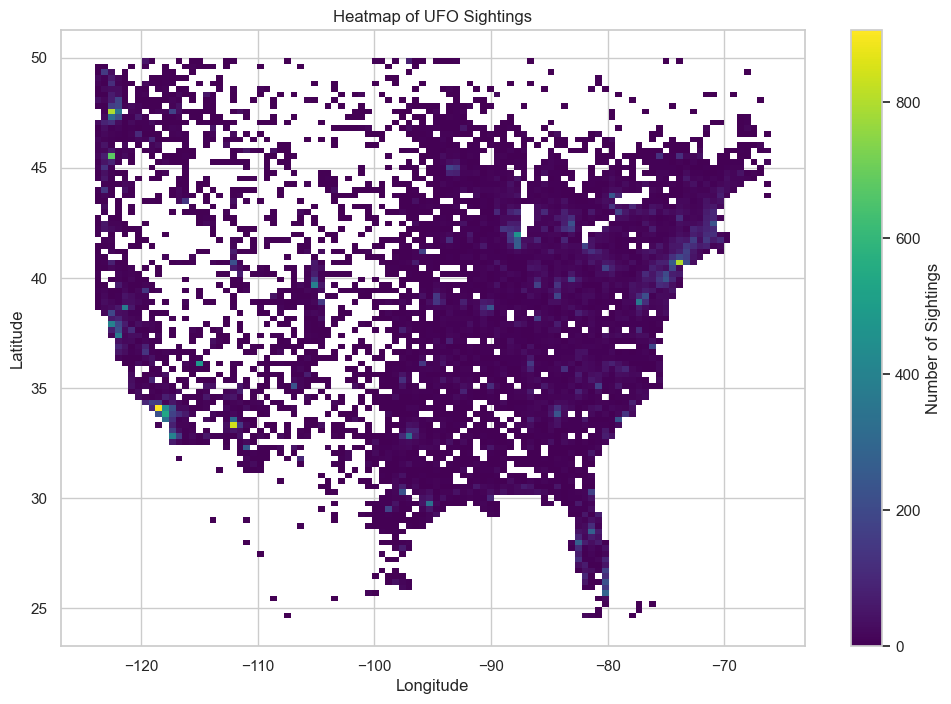

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' columns in your DataFrame
filtered_ufos = ufos[(ufos['latitude'] >= 24) & (ufos['latitude'] <= 50) & (ufos['longitude'] >= -124) & (ufos['longitude'] <= -66)]

# Create a 2D histogram (heatmap) using seaborn
plt.figure(figsize=(12, 8))
sns.histplot(filtered_ufos, x='longitude', y='latitude', bins=100, cmap='viridis', cbar=True, cbar_kws={'label': 'Number of Sightings'})
plt.title('Heatmap of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show


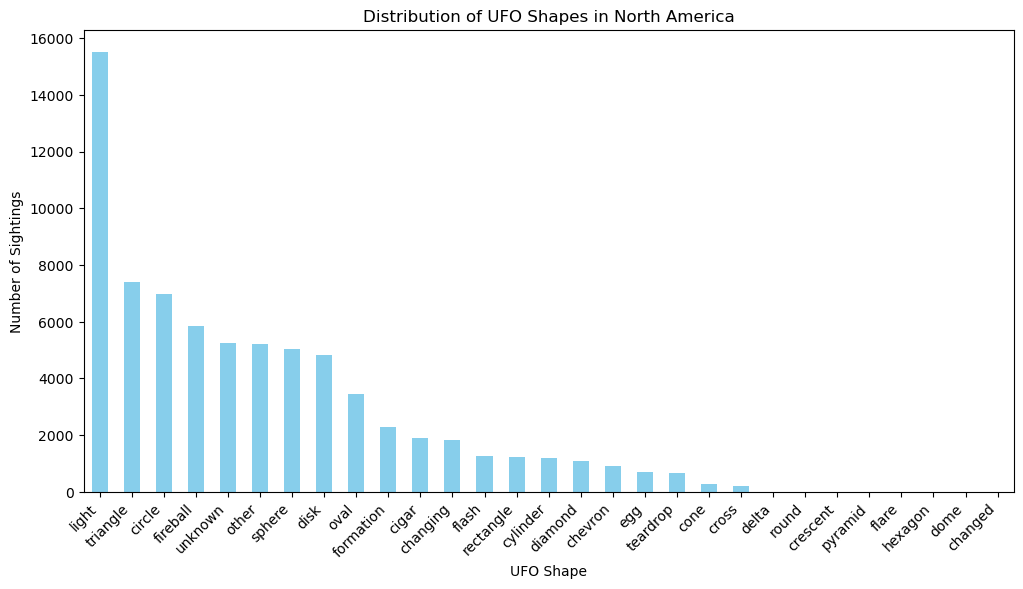

In [8]:
import matplotlib.pyplot as plt

# Assuming 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]

# Count the occurrences of each shape
shape_counts = filtered_ufos['ufo_shape'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
shape_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes in North America')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


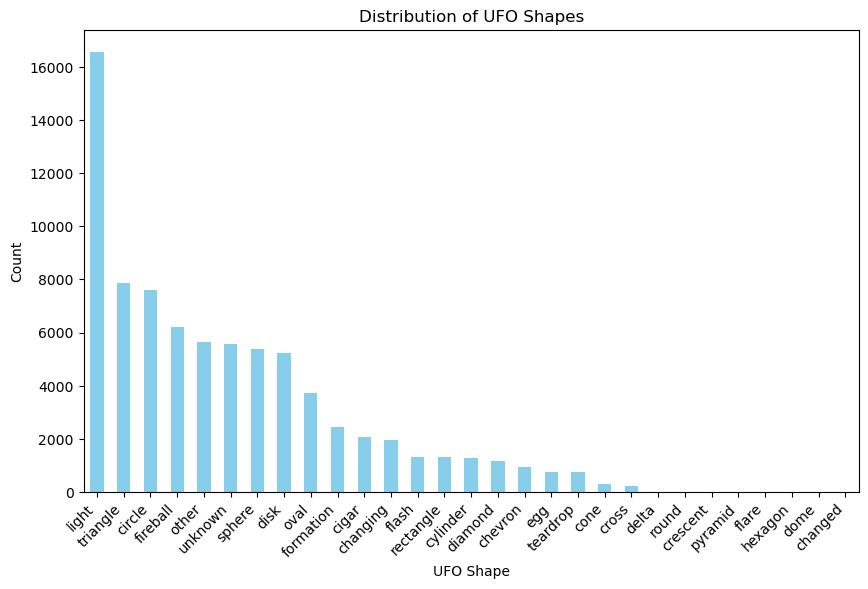

In [9]:
import matplotlib.pyplot as plt

ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shapes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
# Assuming your DataFrame is named 'df'
ufos['date_time'] = ufos['date_time'].str.replace('24:00', '00:00')
ufos['date_time'] = pd.to_datetime(ufos['date_time'], errors='coerce')

# Drop rows with invalid datetime values
ufos.dropna(subset=['date_time'], inplace=True)

ufos['day'] = ufos['date_time'].dt.day
ufos['month'] = ufos['date_time'].dt.month
ufos['year'] = ufos['date_time'].dt.year

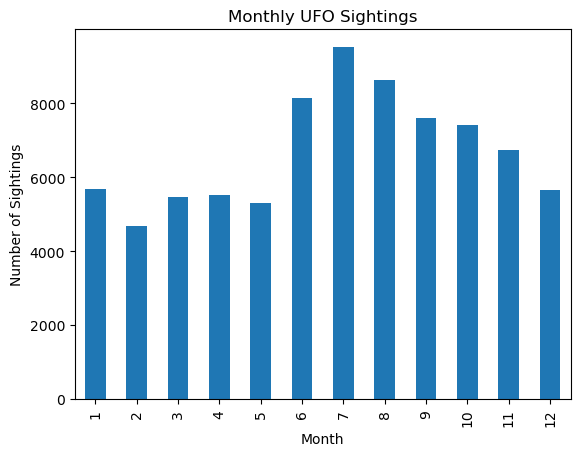

In [11]:
import matplotlib.pyplot as plt

monthly_counts = ufos.groupby('month').size()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Number of Sightings', title='Monthly UFO Sightings')
plt.show()

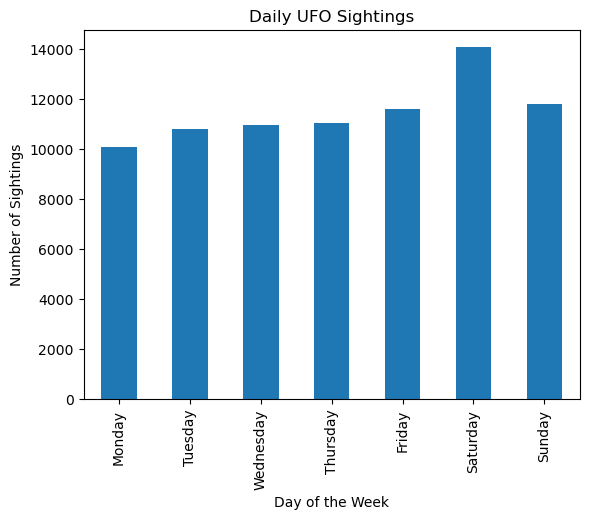

In [12]:
daily_counts = ufos.groupby(ufos['date_time'].dt.day_name()).size()
daily_counts = daily_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_counts.plot(kind='bar', xlabel='Day of the Week', ylabel='Number of Sightings', title='Daily UFO Sightings')
plt.show()

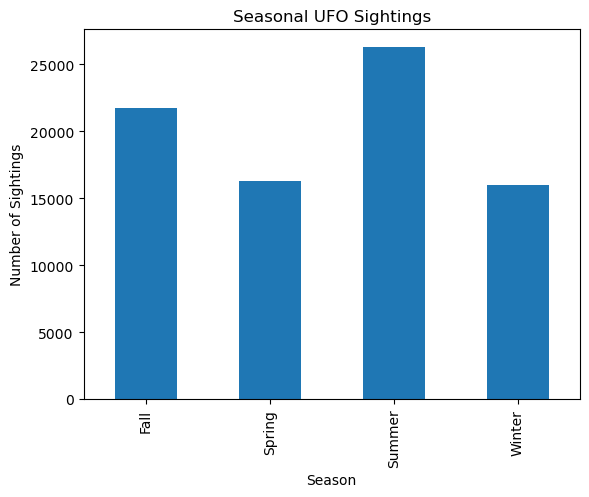

In [13]:
season_mapper = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
ufos['season'] = ufos['month'].map(season_mapper)

seasonal_counts = ufos.groupby('season').size()
seasonal_counts.plot(kind='bar', xlabel='Season', ylabel='Number of Sightings', title='Seasonal UFO Sightings')
plt.show()

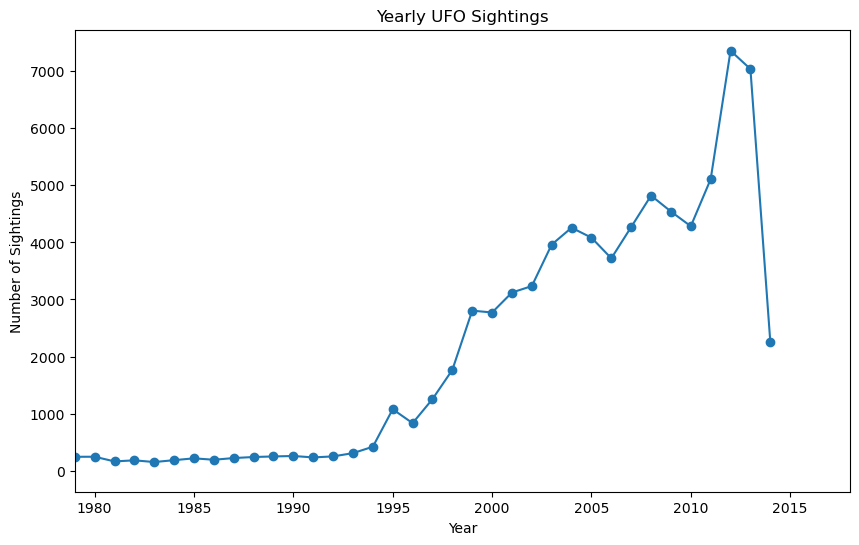

In [14]:
yearly_counts = ufos.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Sightings', title='Yearly UFO Sightings')

# Set the x-axis limits
plt.xlim(1979, 2018)

plt.show()

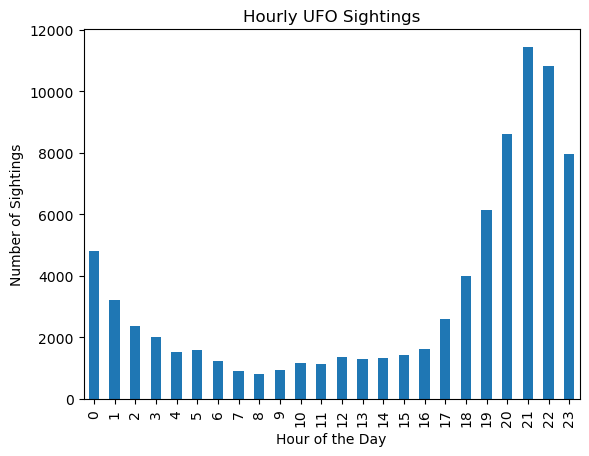

In [15]:
ufos['hour'] = ufos['date_time'].dt.hour
hourly_counts = ufos.groupby('hour').size()
hourly_counts.plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Sightings', title='Hourly UFO Sightings')
plt.show()

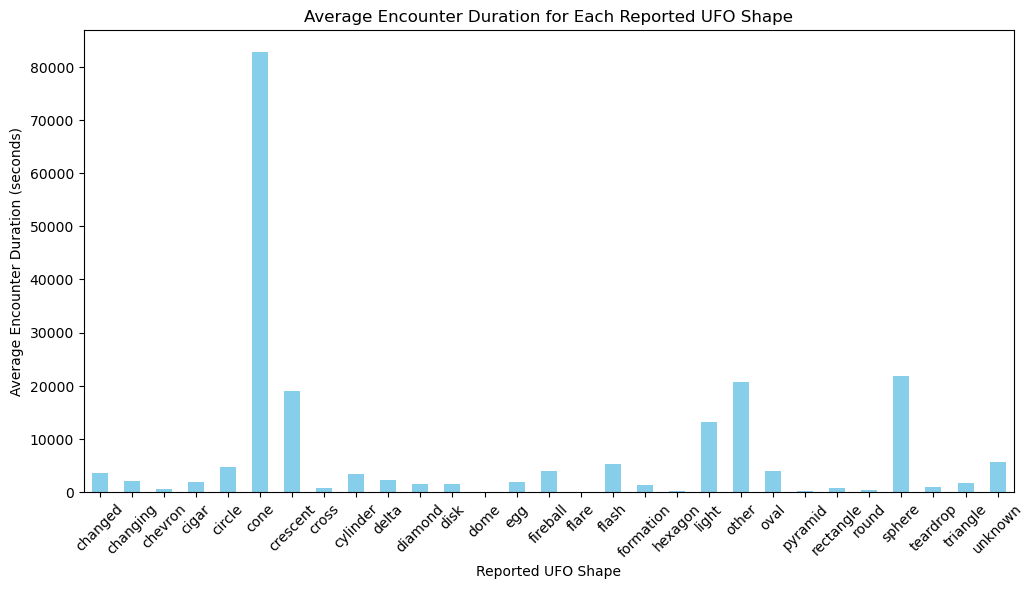

In [16]:
shape_grouped = ufos.groupby('ufo_shape')['encounter_length'].mean()
#print(shape_grouped)
plt.figure(figsize=(12, 6))
shape_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Reported UFO Shape')
plt.ylabel('Average Encounter Duration (seconds)')
plt.title('Average Encounter Duration for Each Reported UFO Shape')
plt.xticks(rotation=45)
plt.show()

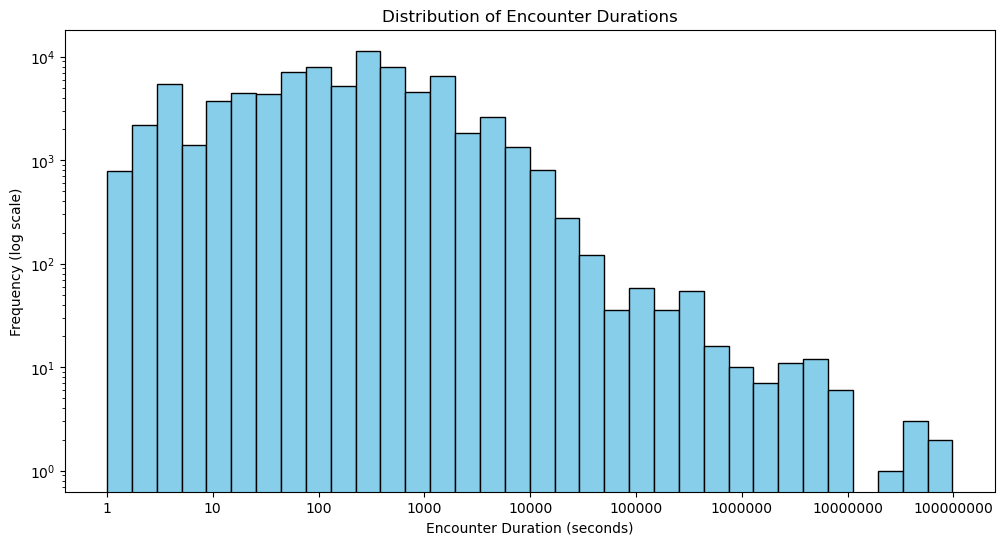

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Use a logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Increase the number of bins for better resolution
plt.hist(ufos['encounter_length'], bins=np.logspace(np.log10(1), np.log10(ufos['encounter_length'].max()), 35), color='skyblue', edgecolor='black')

plt.xscale('log')  # Use a logarithmic scale on the x-axis if needed
custom_ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # Adjust as needed based on your data
plt.xticks(custom_ticks, custom_ticks)
plt.xlabel('Encounter Duration (seconds)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Encounter Durations')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
data = ufos[['latitude', 'longitude', 'ufo_shape']]

# Drop missing values if any
data = data.dropna()

# Encode categorical variable 'ufo_shape'
le = LabelEncoder()
data['ufo_shape'] = le.fit_transform(data['ufo_shape'])

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude']]
y = data['ufo_shape']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.16
              precision    recall  f1-score   support

           1       0.04      0.01      0.02       373
           2       0.02      0.01      0.01       191
           3       0.06      0.03      0.04       401
           4       0.11      0.10      0.10      1545
           5       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        56
           8       0.07      0.03      0.04       273
          10       0.03      0.01      0.02       236
          11       0.10      0.07      0.08      1088
          13       0.03      0.01      0.02       162
          14       0.11      0.08      0.09      1206
          16       0.06      0.03      0.04       267
          17       0.07      0.04      0.05       488
          19       0.22      0.51      0.30      3229
          20       0.11      0.06      0.08      1156
          21       0.06      0.03      0.04       706
          23       0.05      0.02      0.03       272
          24

# Conclusion

This is where we put the conclusion

latitude     0
longitude    0
dtype: int64


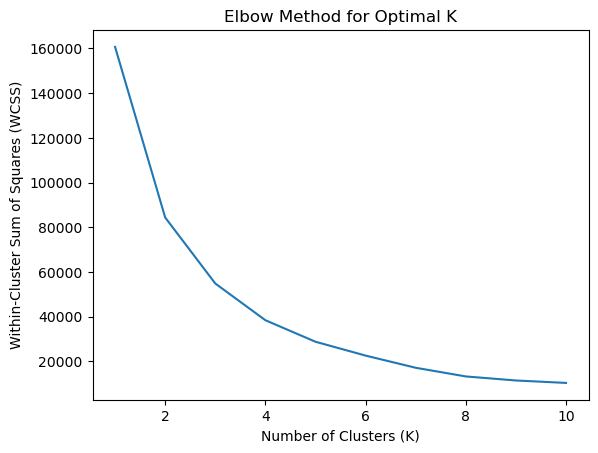

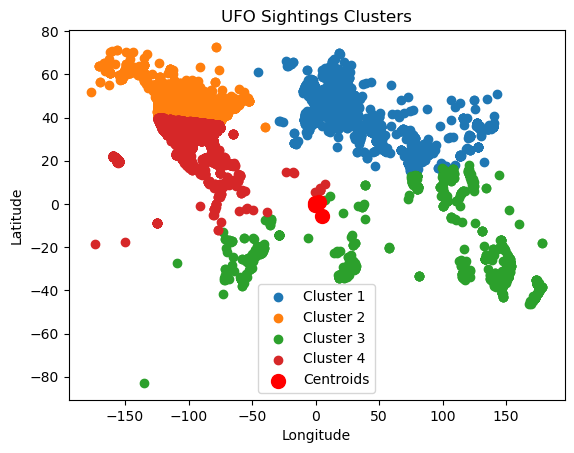

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coordinates_df = ufos[['latitude', 'longitude']]



coordinates_df = coordinates_df.dropna()

coordinates_df.head()

nan_count = coordinates_df.isna().sum()
print(nan_count)


scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_df)

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Let's say the optimal K is 4 (as an example)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
coordinates_df['cluster'] = kmeans.fit_predict(coordinates_scaled)

# Scatter plot for each cluster
for cluster in range(optimal_k):
    cluster_df = coordinates_df[coordinates_df['cluster'] == cluster]
    plt.scatter(cluster_df['longitude'], cluster_df['latitude'], label=f'Cluster {cluster + 1}')

# Plot the centroids if needed
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='red', label='Centroids')

plt.title('UFO Sightings Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

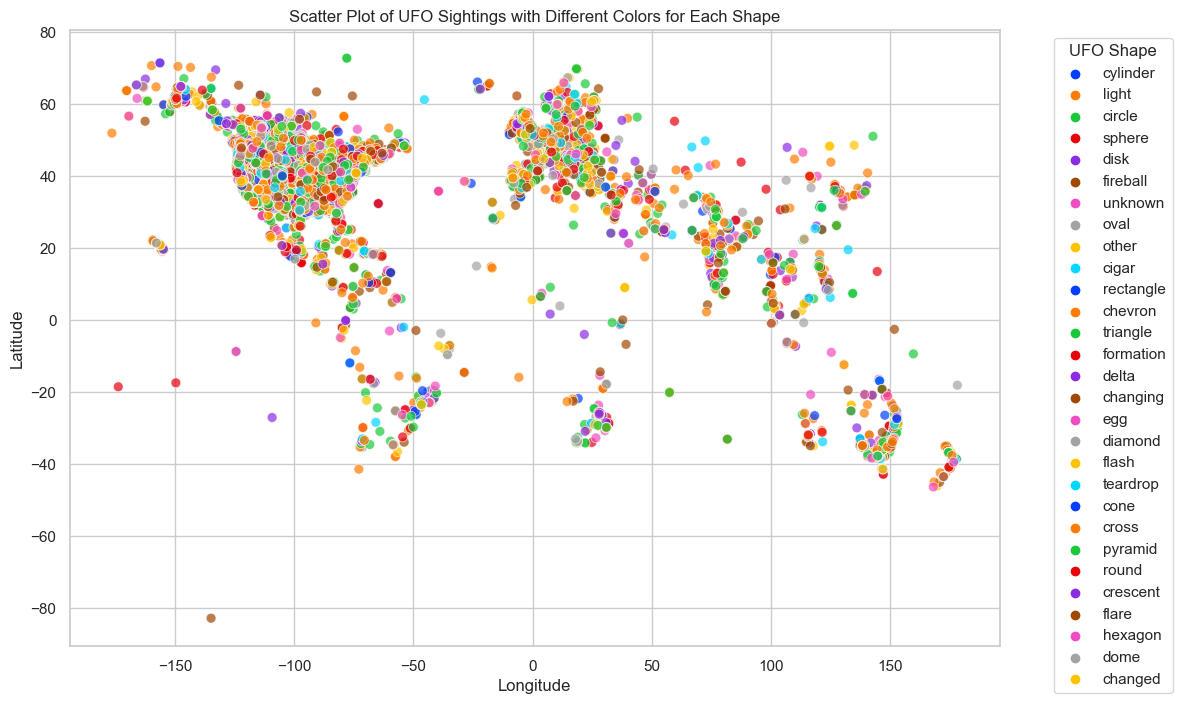

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'ufos' with columns 'latitude', 'longitude', and 'ufo_shape'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Use a different color for each unique shape with more contrast
sns.scatterplot(x='longitude', y='latitude', hue='ufo_shape', data=ufos, palette='bright', s=50, alpha=0.7)

plt.title('Scatter Plot of UFO Sightings with Different Colors for Each Shape')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


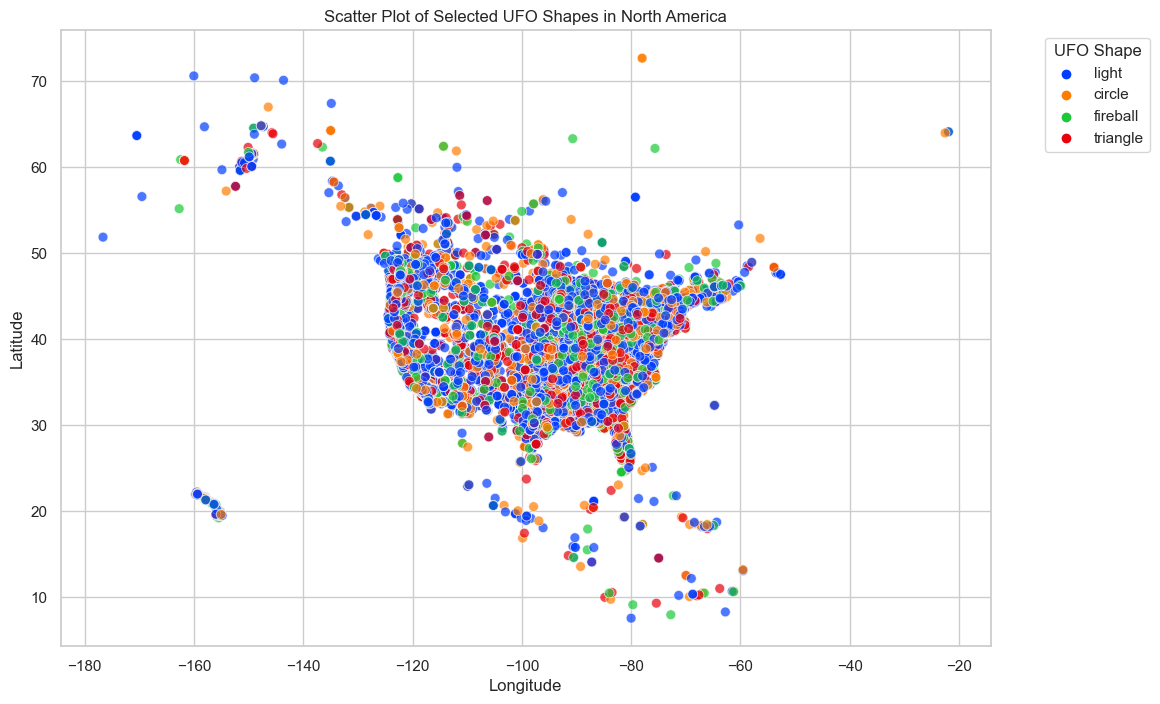

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the latitude and longitude range
latitude_range = (7, 85)
longitude_range = (-179, -20)

# Select only specific UFO shapes within the specified range
selected_shapes = ['light', 'triangle', 'circle', 'fireball']
selected_ufos = ufos[(ufos['ufo_shape'].isin(selected_shapes)) & 
                     (ufos['latitude'].between(latitude_range[0], latitude_range[1])) & 
                     (ufos['longitude'].between(longitude_range[0], longitude_range[1]))]

# Set the style and create the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='ufo_shape', data=selected_ufos, palette='bright', s=50, alpha=0.7)

plt.title('Scatter Plot of Selected UFO Shapes in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
